# Airline Passenger Satisfaction analysis using Supervised Learning

In [6]:
# importing essential libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load and check dataset

In [8]:
# Loading the dataset
df=pd.read_csv('passenger_data.csv')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [9]:
# dropping the unwanted column of the dataset
df.drop(columns=["Unnamed: 0"],inplace=True)

In [10]:
df.head() # displays top 5 values by default

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [11]:
df.tail() # displays bottom 5 values by default

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [12]:
# to get a concise summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [13]:
# statistical details of the dataset
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [14]:
df.count()

id                                   103904
Gender                               103904
Customer Type                        103904
Age                                  103904
Type of Travel                       103904
Class                                103904
Flight Distance                      103904
Inflight wifi service                103904
Departure/Arrival time convenient    103904
Ease of Online booking               103904
Gate location                        103904
Food and drink                       103904
Online boarding                      103904
Seat comfort                         103904
Inflight entertainment               103904
On-board service                     103904
Leg room service                     103904
Baggage handling                     103904
Checkin service                      103904
Inflight service                     103904
Cleanliness                          103904
Departure Delay in Minutes           103904
Arrival Delay in Minutes        

In [15]:
# shape of dataset
df.shape

(103904, 24)

In [16]:
df.mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_20864\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


id                                   64924.210502
Age                                     39.379706
Flight Distance                       1189.448375
Inflight wifi service                    2.729683
Departure/Arrival time convenient        3.060296
Ease of Online booking                   2.756901
Gate location                            2.976883
Food and drink                           3.202129
Online boarding                          3.250375
Seat comfort                             3.439396
Inflight entertainment                   3.358158
On-board service                         3.382363
Leg room service                         3.351055
Baggage handling                         3.631833
Checkin service                          3.304290
Inflight service                         3.640428
Cleanliness                              3.286351
Departure Delay in Minutes              14.815618
Arrival Delay in Minutes                15.178678
dtype: float64

In [17]:
df.median()

C:\Users\hp\AppData\Local\Temp\ipykernel_20864\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


id                                   64856.5
Age                                     40.0
Flight Distance                        843.0
Inflight wifi service                    3.0
Departure/Arrival time convenient        3.0
Ease of Online booking                   3.0
Gate location                            3.0
Food and drink                           3.0
Online boarding                          3.0
Seat comfort                             4.0
Inflight entertainment                   4.0
On-board service                         4.0
Leg room service                         4.0
Baggage handling                         4.0
Checkin service                          3.0
Inflight service                         4.0
Cleanliness                              3.0
Departure Delay in Minutes               0.0
Arrival Delay in Minutes                 0.0
dtype: float64

In [18]:
df.min()

id                                                         1
Gender                                                Female
Customer Type                                 Loyal Customer
Age                                                        7
Type of Travel                               Business travel
Class                                               Business
Flight Distance                                           31
Inflight wifi service                                      0
Departure/Arrival time convenient                          0
Ease of Online booking                                     0
Gate location                                              0
Food and drink                                             0
Online boarding                                            0
Seat comfort                                               0
Inflight entertainment                                     0
On-board service                                           0
Leg room service        

In [19]:
df.max()

id                                              129880
Gender                                            Male
Customer Type                        disloyal Customer
Age                                                 85
Type of Travel                         Personal Travel
Class                                         Eco Plus
Flight Distance                                   4983
Inflight wifi service                                5
Departure/Arrival time convenient                    5
Ease of Online booking                               5
Gate location                                        5
Food and drink                                       5
Online boarding                                      5
Seat comfort                                         5
Inflight entertainment                               5
On-board service                                     5
Leg room service                                     5
Baggage handling                                     5
Checkin se

In [20]:
# finding null values
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [21]:
# finding mean of the column with null values
import numpy as np
np.mean(df['Arrival Delay in Minutes'])

15.178678301832152

In [22]:
# filling the null values using fillna method
df["Arrival Delay in Minutes"]=df["Arrival Delay in Minutes"].fillna(np.mean(df["Arrival Delay in Minutes"]))

In [23]:
# all null/missing values filled with the mean
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [24]:
# finding duplicates in the data
df.duplicated().sum()

0

In [25]:
# sorting the data
df.sort_values(by='id',inplace=True)
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
90131,1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
47865,2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
44425,3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
96450,4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
72524,5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97767,129874,Female,Loyal Customer,28,Personal Travel,Eco Plus,337,4,2,4,...,3,1,5,3,4,4,3,0,0.0,neutral or dissatisfied
53459,129875,Female,Loyal Customer,55,Personal Travel,Eco Plus,308,3,4,3,...,4,4,3,4,4,4,4,0,0.0,neutral or dissatisfied
32973,129878,Male,Loyal Customer,42,Personal Travel,Eco Plus,337,2,5,2,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied
82052,129879,Male,Loyal Customer,50,Personal Travel,Eco Plus,337,5,4,4,...,3,4,5,5,3,4,3,31,22.0,satisfied


In [26]:
data=df

<Axes: xlabel='satisfaction', ylabel='count'>

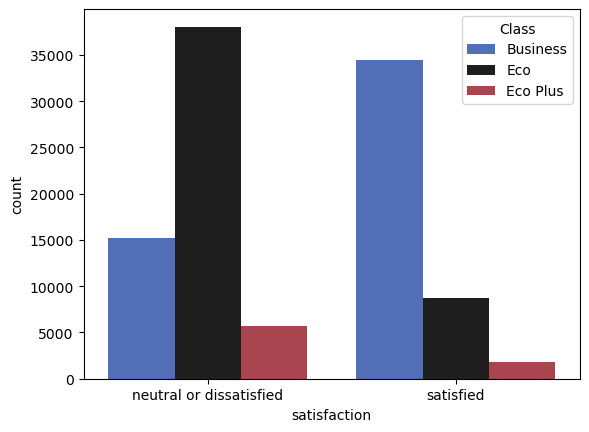

In [23]:
sns.countplot(x='satisfaction',hue='Class',data=df,palette='icefire')

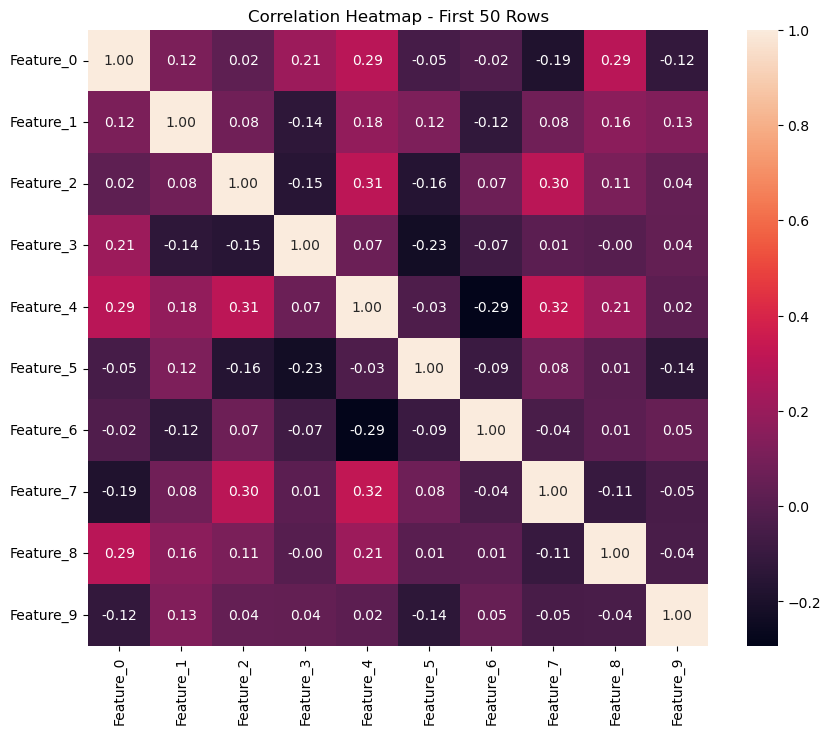

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named 'df'
# Create a sample DataFrame with random data for demonstration purposes
data = np.random.rand(50, 10)
columns = [f'Feature_{i}' for i in range(10)]
df = pd.DataFrame(data, columns=columns)

# Select the first 50 rows from the DataFrame
subset_df = df.iloc[:50, :]

# Create a heatmap
fig = plt.figure(figsize=(10, 8))
sns.heatmap(subset_df.corr(), fmt=".2f", annot=True)
plt.title("Correlation Heatmap - First 50 Rows")
plt.show()


# Logistic Regression

In [27]:
# accessing unique values in the particular column
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [28]:
# categorical values to numeric values using map() function
df['satisfaction']=df['satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
90131,1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,0
47865,2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,1
44425,3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,1
96450,4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,1
72524,5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97767,129874,Female,Loyal Customer,28,Personal Travel,Eco Plus,337,4,2,4,...,3,1,5,3,4,4,3,0,0.0,0
53459,129875,Female,Loyal Customer,55,Personal Travel,Eco Plus,308,3,4,3,...,4,4,3,4,4,4,4,0,0.0,0
32973,129878,Male,Loyal Customer,42,Personal Travel,Eco Plus,337,2,5,2,...,3,3,4,5,4,4,3,6,14.0,0
82052,129879,Male,Loyal Customer,50,Personal Travel,Eco Plus,337,5,4,4,...,3,4,5,5,3,4,3,31,22.0,1


In [29]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [30]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
90131,1,1,disloyal Customer,48,Business travel,Business,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,0
47865,2,0,Loyal Customer,35,Business travel,Business,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,1
44425,3,1,Loyal Customer,41,Business travel,Business,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,1
96450,4,1,Loyal Customer,50,Business travel,Business,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,1
72524,5,0,Loyal Customer,49,Business travel,Business,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97767,129874,0,Loyal Customer,28,Personal Travel,Eco Plus,337,4,2,4,...,3,1,5,3,4,4,3,0,0.0,0
53459,129875,0,Loyal Customer,55,Personal Travel,Eco Plus,308,3,4,3,...,4,4,3,4,4,4,4,0,0.0,0
32973,129878,1,Loyal Customer,42,Personal Travel,Eco Plus,337,2,5,2,...,3,3,4,5,4,4,3,6,14.0,0
82052,129879,1,Loyal Customer,50,Personal Travel,Eco Plus,337,5,4,4,...,3,4,5,5,3,4,3,31,22.0,1


In [31]:
df['Customer Type'].unique()

array(['disloyal Customer', 'Loyal Customer'], dtype=object)

In [32]:
df['Customer Type']=df['Customer Type'].map({'Loyal Customer':1,'disloyal Customer':0})
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
90131,1,1,0,48,Business travel,Business,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,0
47865,2,0,1,35,Business travel,Business,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,1
44425,3,1,1,41,Business travel,Business,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,1
96450,4,1,1,50,Business travel,Business,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,1
72524,5,0,1,49,Business travel,Business,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97767,129874,0,1,28,Personal Travel,Eco Plus,337,4,2,4,...,3,1,5,3,4,4,3,0,0.0,0
53459,129875,0,1,55,Personal Travel,Eco Plus,308,3,4,3,...,4,4,3,4,4,4,4,0,0.0,0
32973,129878,1,1,42,Personal Travel,Eco Plus,337,2,5,2,...,3,3,4,5,4,4,3,6,14.0,0
82052,129879,1,1,50,Personal Travel,Eco Plus,337,5,4,4,...,3,4,5,5,3,4,3,31,22.0,1


In [33]:
df['Type of Travel'].unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [34]:
df['Type of Travel']=df['Type of Travel'].map({'Personal Travel':1,'Business travel':0})
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
90131,1,1,0,48,0,Business,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,0
47865,2,0,1,35,0,Business,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,1
44425,3,1,1,41,0,Business,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,1
96450,4,1,1,50,0,Business,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,1
72524,5,0,1,49,0,Business,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97767,129874,0,1,28,1,Eco Plus,337,4,2,4,...,3,1,5,3,4,4,3,0,0.0,0
53459,129875,0,1,55,1,Eco Plus,308,3,4,3,...,4,4,3,4,4,4,4,0,0.0,0
32973,129878,1,1,42,1,Eco Plus,337,2,5,2,...,3,3,4,5,4,4,3,6,14.0,0
82052,129879,1,1,50,1,Eco Plus,337,5,4,4,...,3,4,5,5,3,4,3,31,22.0,1


In [35]:
df['Class'].unique()

array(['Business', 'Eco', 'Eco Plus'], dtype=object)

In [36]:
#for binary classification and stored in dataset

df = df[df['Class'] != 'Eco']
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
90131,1,1,0,48,0,Business,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,0
47865,2,0,1,35,0,Business,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,1
44425,3,1,1,41,0,Business,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,1
96450,4,1,1,50,0,Business,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,1
72524,5,0,1,49,0,Business,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97767,129874,0,1,28,1,Eco Plus,337,4,2,4,...,3,1,5,3,4,4,3,0,0.0,0
53459,129875,0,1,55,1,Eco Plus,308,3,4,3,...,4,4,3,4,4,4,4,0,0.0,0
32973,129878,1,1,42,1,Eco Plus,337,2,5,2,...,3,3,4,5,4,4,3,6,14.0,0
82052,129879,1,1,50,1,Eco Plus,337,5,4,4,...,3,4,5,5,3,4,3,31,22.0,1


In [37]:
df['Class']=df['Class'].map({'Eco Plus':1,'Business':0})
df

C:\Users\hp\AppData\Local\Temp\ipykernel_20864\3432616824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class']=df['Class'].map({'Eco Plus':1,'Business':0})


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
90131,1,1,0,48,0,0,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,0
47865,2,0,1,35,0,0,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,1
44425,3,1,1,41,0,0,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,1
96450,4,1,1,50,0,0,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,1
72524,5,0,1,49,0,0,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97767,129874,0,1,28,1,1,337,4,2,4,...,3,1,5,3,4,4,3,0,0.0,0
53459,129875,0,1,55,1,1,308,3,4,3,...,4,4,3,4,4,4,4,0,0.0,0
32973,129878,1,1,42,1,1,337,2,5,2,...,3,3,4,5,4,4,3,6,14.0,0
82052,129879,1,1,50,1,1,337,5,4,4,...,3,4,5,5,3,4,3,31,22.0,1


In [38]:
# finding correlation of each column of dataframe
data = df.corr()
data

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,1.000000,0.000052,-0.048977,0.032495,-0.033070,-0.094504,0.041716,0.007342,-0.013404,0.014329,...,0.022228,0.082468,0.058403,0.100082,0.121411,0.097957,0.063001,-0.015650,-0.034935,0.043247
Gender,0.000052,1.000000,0.029907,0.007711,0.001590,-0.016281,0.005952,0.006524,0.005718,0.006972,...,0.005292,0.000634,0.007251,0.010153,0.003347,0.007833,0.011188,0.005756,0.003430,0.014466
Customer Type,-0.048977,0.029907,1.000000,0.249628,0.133251,0.051081,0.284035,-0.032247,0.118350,0.003055,...,0.163538,-0.010378,0.053772,-0.122563,-0.059767,-0.122897,0.123666,0.007715,0.008218,0.225895
Age,0.032495,0.007711,0.249628,1.000000,-0.071678,-0.073764,0.094969,-0.007317,0.032056,-0.000369,...,0.100264,0.096456,0.110948,-0.023574,0.048980,-0.035152,0.055542,-0.009287,-0.011565,0.131077
Type of Travel,-0.033070,0.001590,0.133251,-0.071678,1.000000,0.490484,-0.223768,-0.060434,0.155668,-0.089598,...,-0.135834,-0.096492,-0.151595,-0.086617,-0.034611,-0.079791,-0.067533,0.004125,0.004307,-0.372264
Class,-0.094504,-0.016281,0.051081,-0.073764,0.490484,1.000000,-0.278756,-0.001765,0.069841,-0.058119,...,-0.131463,-0.173726,-0.156883,-0.141616,-0.139398,-0.135318,-0.093080,0.009246,0.013349,-0.314303
Flight Distance,0.041716,0.005952,0.284035,0.094969,-0.223768,-0.278756,1.000000,-0.004065,-0.001536,0.032849,...,0.110123,0.058508,0.095519,0.010195,0.032240,0.007141,0.079167,0.004872,0.001679,0.208180
Inflight wifi service,0.007342,0.006524,-0.032247,-0.007317,-0.060434,-0.001765,-0.004065,1.000000,0.564053,0.737511,...,0.213145,0.156055,0.171708,0.179983,0.060383,0.163470,0.118194,-0.009702,-0.010999,0.204243
Departure/Arrival time convenient,-0.013404,0.005718,0.118350,0.032056,0.155668,0.069841,-0.001536,0.564053,1.000000,0.623527,...,0.017045,0.017420,0.016499,0.014597,0.017308,0.013286,0.017201,0.002436,0.001497,-0.014368
Ease of Online booking,0.014329,0.006972,0.003055,-0.000369,-0.089598,-0.058119,0.032849,0.737511,0.623527,1.000000,...,0.043239,0.040184,0.081849,0.050928,0.005348,0.046641,0.006066,0.006315,0.005165,0.091397


In [39]:
# indexing by location 
x=df.iloc[:,0:23]
x

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
90131,1,1,0,48,0,0,821,3,3,3,...,5,5,3,2,5,4,5,5,2,5.0
47865,2,0,1,35,0,0,821,2,2,2,...,4,5,5,5,5,3,5,5,26,39.0
44425,3,1,1,41,0,0,853,4,4,4,...,5,3,3,3,3,4,3,5,0,0.0
96450,4,1,1,50,0,0,1905,2,2,2,...,5,5,5,5,5,3,5,4,0,0.0
72524,5,0,1,49,0,0,3470,3,3,3,...,4,3,3,4,3,3,3,5,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97767,129874,0,1,28,1,1,337,4,2,4,...,3,3,1,5,3,4,4,3,0,0.0
53459,129875,0,1,55,1,1,308,3,4,3,...,3,4,4,3,4,4,4,4,0,0.0
32973,129878,1,1,42,1,1,337,2,5,2,...,3,3,3,4,5,4,4,3,6,14.0
82052,129879,1,1,50,1,1,337,5,4,4,...,4,3,4,5,5,3,4,3,31,22.0


In [40]:
y=df.iloc[:,23:24]
y

,satisfaction
90131,0
47865,1
44425,1
96450,1
72524,1
...,...
97767,0
53459,0
32973,0
82052,1


In [41]:
# train test split
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.11,random_state=40)

In [43]:
X_train

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
53367,44137,0,1,80,0,0,2858,1,1,1,...,4,1,1,1,1,3,1,3,0,0.0
3327,17457,1,1,28,1,1,351,3,3,3,...,5,5,1,1,3,2,2,5,0,0.0
31943,75938,1,1,59,0,0,1572,1,1,1,...,5,3,3,3,3,5,3,5,0,0.0
69460,71729,0,0,37,0,1,607,2,3,3,...,1,3,3,4,5,3,5,3,0,0.0
12384,17955,0,1,60,0,0,460,4,4,4,...,4,5,5,5,5,2,5,3,46,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52028,68148,0,0,41,0,0,597,3,4,4,...,5,5,3,5,5,4,5,5,0,0.0
64769,36239,0,1,58,0,1,496,2,3,3,...,3,2,2,2,2,4,2,3,0,18.0
76766,74462,1,0,36,0,0,1438,2,3,3,...,1,1,5,3,4,4,5,1,12,10.0
71708,109495,1,1,49,0,0,2754,3,3,5,...,4,5,5,5,5,5,5,3,11,0.0


In [44]:
y_train

,satisfaction
53367,0
3327,0
31943,1
69460,0
12384,1
...,...
52028,0
64769,0
76766,0
71708,1


In [45]:
X_test

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
95186,31035,0,1,22,0,0,641,5,5,5,...,5,5,5,2,2,5,5,5,96,112.0
85673,71284,1,1,52,0,0,1853,4,4,4,...,4,4,4,4,4,3,4,3,0,5.0
27078,77954,0,1,42,0,0,332,3,3,5,...,5,5,5,5,5,3,5,3,0,0.0
43411,95471,1,1,46,0,0,1727,2,2,2,...,5,4,4,4,4,4,4,3,0,0.0
79262,105891,1,1,48,0,0,283,0,0,0,...,5,5,5,2,2,3,5,5,12,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17205,10745,0,0,32,0,0,316,3,2,2,...,4,4,5,3,5,4,5,4,0,0.0
33984,70107,1,1,54,0,0,2221,5,4,5,...,4,5,5,5,5,4,5,3,50,47.0
35712,102165,0,1,40,0,0,226,0,0,0,...,5,5,5,5,5,5,5,4,4,0.0
52127,100977,1,1,47,0,0,1524,3,3,3,...,5,3,3,3,3,4,3,5,6,0.0


In [46]:
y_test

,satisfaction
95186,1
85673,1
27078,1
43411,1
79262,1
...,...
17205,0
33984,1
35712,1
52127,1


In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
classifier = LogisticRegression()
classifier

LogisticRegression()

In [49]:
from sklearn.model_selection import GridSearchCV

parameter = {'penalty': ['l1','l2','elasticnet'],
             'C': [1,2,3,4,5,6,10,20,30,40,50],
             'max_iter': [100,200,300]}

In [50]:
classifier_regressor = GridSearchCV(classifier, param_grid = parameter, scoring = 'accuracy', cv = 5)

In [51]:
#training model

classifier_regressor.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [52]:
print(classifier_regressor.best_params_)

{'C': 5, 'max_iter': 300, 'penalty': 'l2'}


In [53]:
print(classifier_regressor.best_score_)

0.7518038938200133


In [54]:
#prediction

classifier_regressor.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [55]:
y_pred = classifier_regressor.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [56]:
#accuracy score

from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_pred, y_test)
score

0.7425254452926209

In [57]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.49      0.74      0.59      1582
           1       0.89      0.74      0.81      4706

    accuracy                           0.74      6288
   macro avg       0.69      0.74      0.70      6288
weighted avg       0.79      0.74      0.76      6288



In [58]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
90131,1,1,0,48,0,0,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,0
47865,2,0,1,35,0,0,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,1
44425,3,1,1,41,0,0,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,1
96450,4,1,1,50,0,0,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,1
72524,5,0,1,49,0,0,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97767,129874,0,1,28,1,1,337,4,2,4,...,3,1,5,3,4,4,3,0,0.0,0
53459,129875,0,1,55,1,1,308,3,4,3,...,4,4,3,4,4,4,4,0,0.0,0
32973,129878,1,1,42,1,1,337,2,5,2,...,3,3,4,5,4,4,3,6,14.0,0
82052,129879,1,1,50,1,1,337,5,4,4,...,3,4,5,5,3,4,3,31,22.0,1


# Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
# Post pruning technique
# treemodel=DecisionTreeClassifier()
treemodel=DecisionTreeClassifier(max_depth=5)
treemodel

DecisionTreeClassifier(max_depth=5)

In [61]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

[Text(0.5220588235294118, 0.9166666666666666, 'x[12] <= 3.5\ngini = 0.462\nsamples = 50871\nvalue = [18466, 32405]'),
 Text(0.23039215686274508, 0.75, 'x[7] <= 3.5\ngini = 0.387\nsamples = 18635\nvalue = [13741, 4894]'),
 Text(0.08823529411764706, 0.5833333333333334, 'x[7] <= 0.5\ngini = 0.313\nsamples = 16073\nvalue = [12953, 3120]'),
 Text(0.0392156862745098, 0.4166666666666667, 'x[20] <= 0.5\ngini = 0.01\nsamples = 838\nvalue = [4, 834]'),
 Text(0.0196078431372549, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.058823529411764705, 0.25, 'gini = 0.0\nsamples = 834\nvalue = [0, 834]'),
 Text(0.13725490196078433, 0.4166666666666667, 'x[14] <= 3.5\ngini = 0.255\nsamples = 15235\nvalue = [12949, 2286]'),
 Text(0.09803921568627451, 0.25, 'x[20] <= 4.5\ngini = 0.122\nsamples = 10723\nvalue = [10026, 697]'),
 Text(0.0784313725490196, 0.08333333333333333, 'gini = 0.115\nsamples = 10633\nvalue = [9984, 649]'),
 Text(0.11764705882352941, 0.08333333333333333, 'gini = 0.498\nsamples =

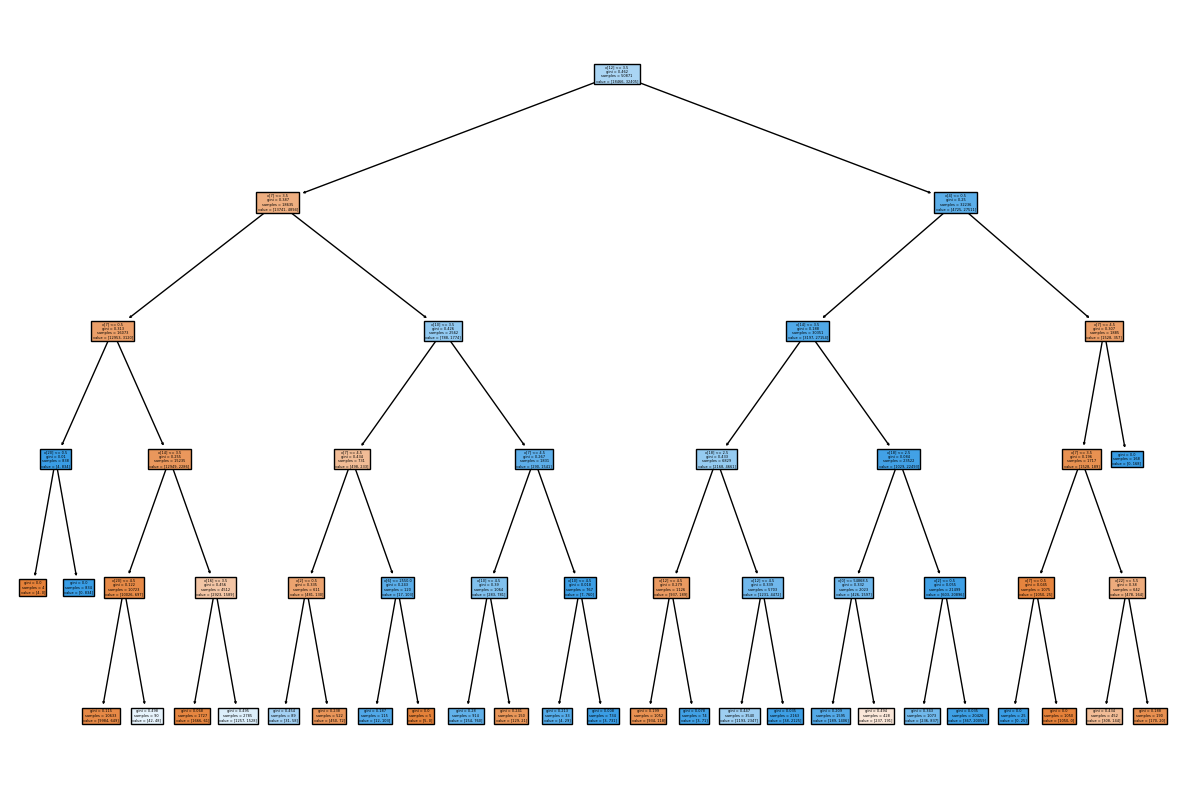

In [62]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [63]:
# prediction
y_pred=treemodel.predict(X_test)

In [64]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score,classification_report

In [66]:
score=accuracy_score(y_pred,y_test)
print(score)

# accuracy max_depth() = 95.8 %
# accuracy change at each level 0.8 %

0.9074427480916031


In [67]:
# prepruning

parameter={'criterion':['gini','entropy','log_loss'],
          'splitter':['best','random'],
          'max_depth':[1,2,3,4,5],
          'max_features':['auto','sqrt','log2'],
          'ccp_alpha':[1,2,3,4,5,6,7]}

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,
               scoring='accuracy')

In [70]:
cv.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\hp\anaconda

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [1, 2, 3, 4, 5, 6, 7],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [71]:
cv.best_params_

{'ccp_alpha': 1,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'auto',
 'splitter': 'best'}

In [72]:
y_pred=cv.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score,classification_report

In [74]:
score=accuracy_score(y_pred,y_test)

In [75]:
score

0.6232506361323156

# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [77]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

C:\Users\hp\AppData\Local\Temp\ipykernel_20864\2225933686.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestClassifier()

In [78]:
#prediction

predictions=model.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [79]:
# random forest classifier score

model_score=accuracy_score(y_test,predictions)
model_score

0.9743956743002544

# Gradient Boosting

In [88]:

gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_predictions

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [95]:
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
# Fit to training set
gbc.fit(X_train, y_train)
 
# Predict on test set
gb_predictions = gbc.predict(X_test)
 
# accuracy
acc = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Classifier accuracy is : 0.95


# AdaBoost classifier

In [97]:
X_train, X_val, Y_train, Y_val = train_test_split( 
    x, y, test_size=0.25, random_state=28)

In [99]:
from sklearn.ensemble import AdaBoostClassifier 
# Creating adaboost classifier model 

adb = AdaBoostClassifier() 
adb_model = adb.fit(X_train,Y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
print("The accuracy of the model on validation set is", adb_model.score(X_val,Y_val))


The accuracy of the model on validation set is 0.9276417074877537


# XGB classifier

In [102]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


In [103]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


In [104]:
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [105]:
y_pred = model.predict(X_test)


In [106]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [107]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9742827151854444

# KNN 

In [108]:

X_train, X_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [111]:
from sklearn.preprocessing import StandardScaler    

st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test) 

In [113]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 
classifier.fit(x_train, y_train) 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [114]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 

In [116]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [118]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9428271518544437